In [1]:
import pickle
import numpy as np

# cat_to_idx = dict()
# cat_to_idx['aeroplane'] = [404,895]
# cat_to_idx['bicycle'] = [444,671]
# cat_to_idx['boat'] = [628,510,814,914,472,871,484,780,625]
# cat_to_idx['bottle'] = [440,737,898,907]
# cat_to_idx['bus'] = [874,654,779]
# cat_to_idx['car'] = [436,656,717,751,817,609,511,627,468,407,661]
# cat_to_idx['chair'] = [559, 765]
# cat_to_idx['diningtable'] = [532]
# cat_to_idx['motorbike'] = [665,670]
# cat_to_idx['sofa'] = [831]
# cat_to_idx['train'] = [466,547,705,820]
# cat_to_idx['tvmonitor'] = [664,782,851]

In [2]:
lb_map_file='/mnt/1TB_SSD/dataset/ILSVRC12/list_fg/cls_labels_1000.txt'
with open(lb_map_file,'r') as fh:
    contents=fh.readlines()
    
lb_code=[cc.strip().split(' ',1)[0] for cc in contents]
lb_txt=[cc.strip().split(' ',1)[1] for cc in contents]

In [2]:
all_categories=['aeroplane','bicycle', 'boat', 'bottle', 'bus', 'car', 'chair', 'diningtable', 'motorbike', 'sofa', 'train', 'tvmonitor']
all_categories2=['aeroplane','bicycle', 'bus', 'car', 'motorbike', 'train']
for category in ['car']:
    # VGG_rst_file = '/mnt/1TB_SSD/qing/PASCAL_adv/result_vgg_B/VGG_predict_{}_adv3.pickle'.format(category)
    VGG_rst_file = '/mnt/1TB_SSD/qing/VC_adv/result_vgg/VGG_predict_car_adv.pickle'
    with open(VGG_rst_file,'rb') as fh:
        rst=pickle.load(fh)
    
    
#     adv_file = '/mnt/1TB_SSD/qing/PASCAL_adv/adv/adv_img_{}.pickle'.format(category)
#     with open(adv_file,'rb') as fh:
#         r_ls, _=pickle.load(fh)
        
#     assert(rst.shape[0]==len(r_ls))
    

    N = len(rst)

    positive=0
    Ncnt=0
    for nn in range(N):
        # if np.max(np.absolute(r_ls[nn]))>15:
        #     continue
            
        Ncnt+=1
        pred_idx = np.argmax(rst[nn])
        if pred_idx == all_categories.index(category):
            positive+=1

    print(positive/Ncnt)

0.93


In [22]:
for category in all_categories:
    VC_rst_file = '/mnt/1TB_SSD/qing/PASCAL_adv/result/scores_{}.pickle'.format(category)
    with open(VC_rst_file,'rb') as fh:
        scores, scores2=pickle.load(fh)
        
    adv_file = '/mnt/1TB_SSD/qing/PASCAL_adv/adv/adv_img_{}_occ.pickle'.format(category)
    with open(adv_file,'rb') as fh:
        r_ls, _=pickle.load(fh)
        
    assert(scores.shape[0]==len(r_ls))
    

    N = scores.shape[0]

    positive=0
    Ncnt=0
    for nn in range(N):
        if np.max(np.absolute(r_ls[nn]))>15:
            continue
            
        Ncnt+=1
        pred_idx = np.argmax(scores[nn])
        if pred_idx == all_categories.index(category):
            positive+=1

    print(positive/Ncnt)
    

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/1TB_SSD/qing/PASCAL_adv/adv/adv_img_aeroplane_occ.pickle'

0 0


In [39]:
noise_r_file = '/mnt/1TB_SSD/qing/PASCAL_adv/universal_r.pickle'
with open(noise_r_file, 'rb') as fh:
    unv_r=pickle.load(fh)
    
print(np.mean(np.absolute(unv_r)))
print(np.max(np.absolute(unv_r)))

7.73181
10.0


In [17]:
all_categories=['aeroplane','bicycle', 'boat', 'bottle', 'bus', 'car', 'chair', 'diningtable', 'motorbike', 'sofa', 'train', 'tvmonitor']
for category in all_categories:
    print(category, end=', ')
    fname = '/mnt/1TB_SSD/qing/PASCAL_adv/adv_fgsm/adv_img_{}.pickle'.format(category)
    with open(fname, 'rb') as fh:
        r_ls, _ = pickle.load(fh)

    # print(len(r_ls))
    to_del = []
    for ri,rr in enumerate(r_ls):
        if np.any(np.isnan(rr)):
            # print(ri)
            to_del.append(ri)
            
    r_ls = [rr for ri,rr in enumerate(r_ls) if ri not in to_del]

    # print(np.mean([np.max(np.absolute(rr))for rr in r_ls]))
    print(np.mean([np.mean(np.absolute(rr))for rr in r_ls]))

aeroplane, 5.0
bicycle, 5.0
boat, 5.0
bottle, 5.0
bus, 5.0
car, 5.0
chair, 5.0
diningtable, 5.0
motorbike, 5.0
sofa, 5.0
train, 5.0
tvmonitor, 5.0


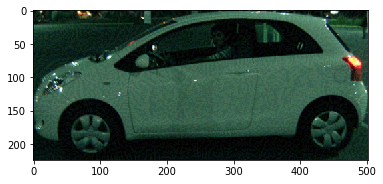

In [25]:
import matplotlib.pyplot as plt

# category = 'car'
# fname = '/mnt/1TB_SSD/qing/PASCAL_adv/adv_fgsm/adv_img_{}.pickle'.format(category)
# with open(fname, 'rb') as fh:
#     _, img_adv = pickle.load(fh)
    
plt.imshow(img_adv[888][:,:,[2,1,0]].astype('uint8'))
plt.show()

In [47]:
fn='/mnt/1TB_SSD/qing/PASCAL_adv/result/scores_{}_cropped_unvr.pickle'
for category in all_categories:
    # print(category, end=', ')
    fname = fn.format(category)
    with open(fname, 'rb') as fh:
        _, score1 = pickle.load(fh)
    
    # print(np.mean(score1[:,0]), np.max(score1[:,0]), np.min(score1[:,0]))
    print(np.mean(score1[:,all_categories.index(category)]))

-9.00150322327
-6.8826396637
-10.2252832377
-9.90984111923
-5.74423889683
-6.54994680879
-7.75606701818
-7.65234883009
-7.81516375073
-7.94317565243
-7.40792094295
-7.58044468614
